In [2]:
import numpy as np
import pandas as pd

table = pd.read_excel("汇总数据1.0.xlsx")

table

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品类,大类,批发价格,单品损耗率,利润加成,利润
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),辣椒类,4.32,7.08,0.759259,1.29888
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否,大白菜,花叶类,2.10,22.27,0.523810,0.93390
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),辣椒类,4.32,7.08,0.759259,1.34152
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否,上海青,花叶类,7.03,14.43,0.422475,1.25037
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否,菜心,花叶类,4.60,13.70,0.739130,1.83260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否,西峡花菇(1),食用菌,14.00,10.80,0.714286,2.84000
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否,长线茄,茄类,10.32,6.90,0.162791,1.12392
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否,西峡花菇(1),食用菌,14.00,10.80,0.714286,1.25000
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否,芜湖青椒(1),辣椒类,6.64,5.70,-0.216867,-0.36288


# 蔬菜各品类之间的分布规律

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

table['销售日期'] = pd.to_datetime(table['销售日期'])

In [4]:
table

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品类,大类,批发价格,单品损耗率,利润加成,利润
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),辣椒类,4.32,7.08,0.759259,1.29888
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否,大白菜,花叶类,2.10,22.27,0.523810,0.93390
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),辣椒类,4.32,7.08,0.759259,1.34152
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否,上海青,花叶类,7.03,14.43,0.422475,1.25037
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否,菜心,花叶类,4.60,13.70,0.739130,1.83260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否,西峡花菇(1),食用菌,14.00,10.80,0.714286,2.84000
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否,长线茄,茄类,10.32,6.90,0.162791,1.12392
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否,西峡花菇(1),食用菌,14.00,10.80,0.714286,1.25000
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否,芜湖青椒(1),辣椒类,6.64,5.70,-0.216867,-0.36288


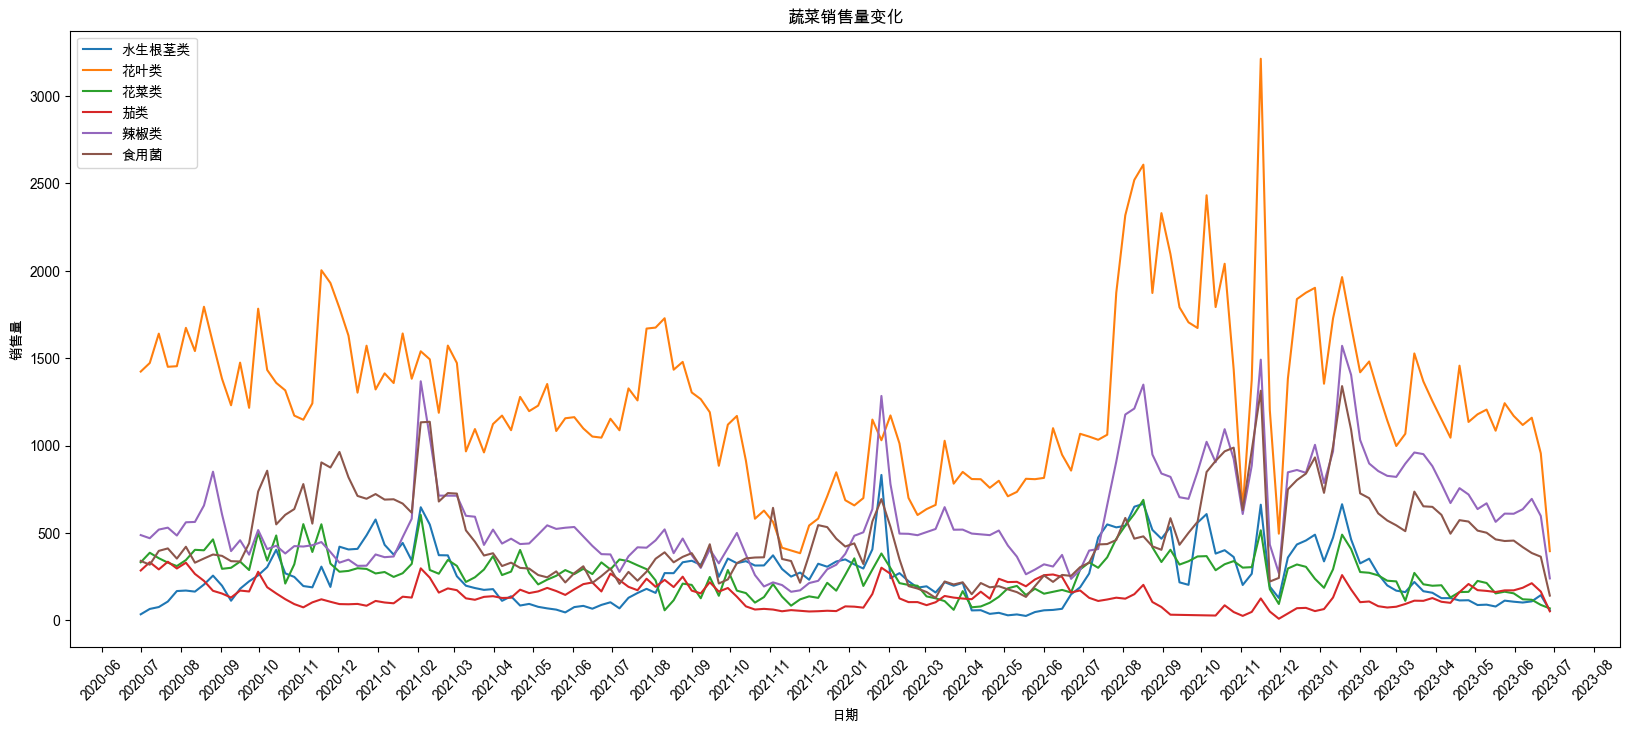

In [6]:
grouped = table.groupby(['大类', pd.Grouper(key='销售日期', freq='7D')])['销量(千克)'].sum().reset_index()
plt.figure(figsize=(20, 8))

for vegetable in grouped['大类'].unique():
    vegetable_data = grouped[grouped['大类'] == vegetable]
    plt.plot(vegetable_data['销售日期'], vegetable_data['销量(千克)'], label=vegetable)
'''
vegetable_data = grouped[grouped['单品类'] == '芜湖青椒(1)']
plt.plot(vegetable_data['销售日期'], vegetable_data['销量(千克)'], label='芜湖青椒(1)')
'''
plt.xlabel('日期')
plt.ylabel('销售量')
plt.title('蔬菜销售量变化')
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.legend(loc='upper left')
plt.xticks(rotation=45)
#plt.savefig('蔬菜销售量变化_品类_全年.png', dpi=300)
plt.show()

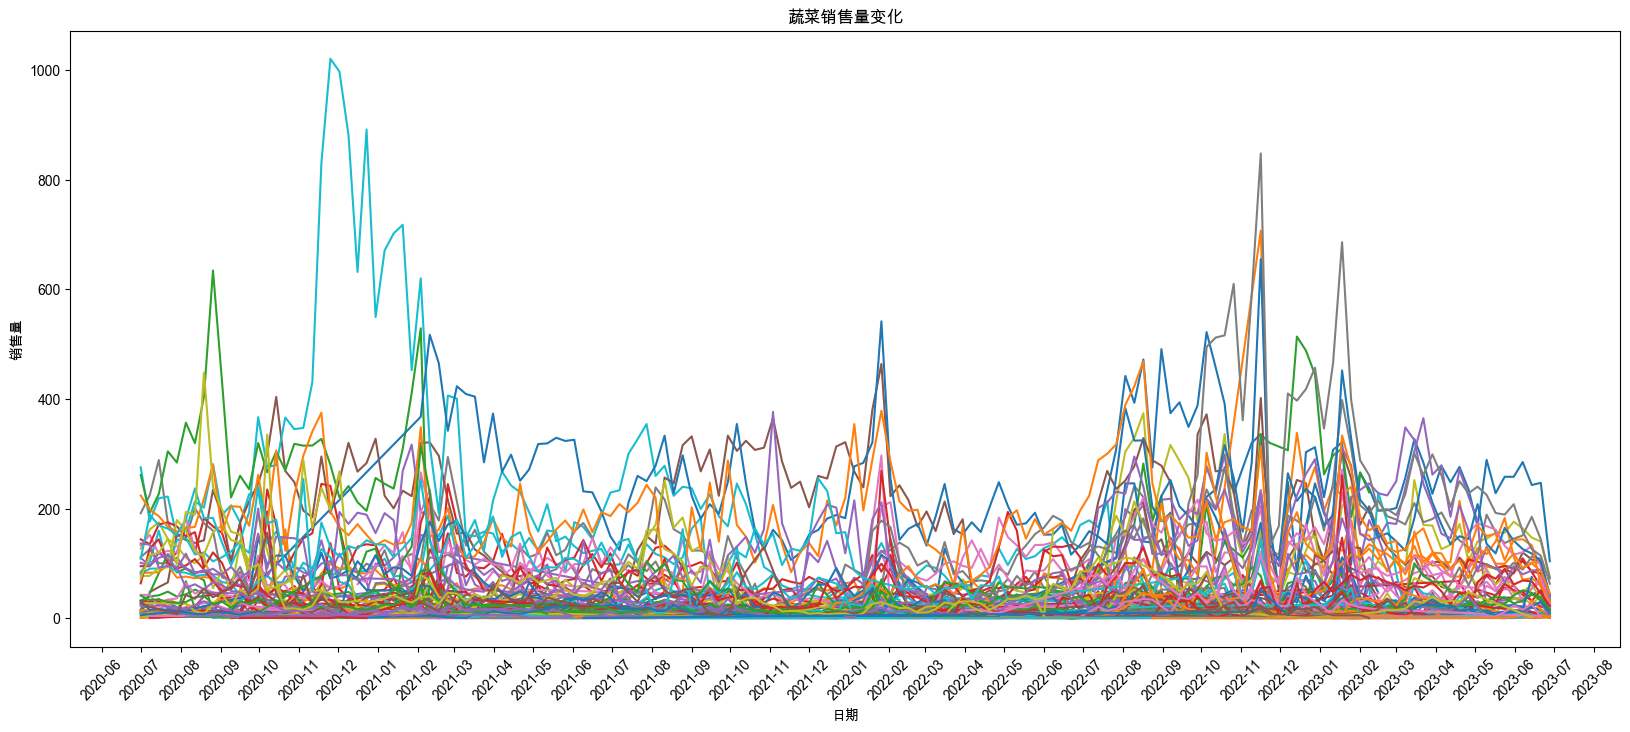

In [8]:
grouped = table.groupby(['单品类', pd.Grouper(key='销售日期', freq='7D')])['销量(千克)'].sum().reset_index()
plt.figure(figsize=(20, 8))

for vegetable in grouped['单品类'].unique():
    vegetable_data = grouped[grouped['单品类'] == vegetable]
    plt.plot(vegetable_data['销售日期'], vegetable_data['销量(千克)'], label=vegetable)
'''
vegetable_data = grouped[grouped['单品类'] == '芜湖青椒(1)']
plt.plot(vegetable_data['销售日期'], vegetable_data['销量(千克)'], label='芜湖青椒(1)')
'''
plt.xlabel('日期')
plt.ylabel('销售量')
plt.title('蔬菜销售量变化')
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
#plt.savefig('蔬菜销售量变化_单品_全年.png', dpi=300)
plt.show()

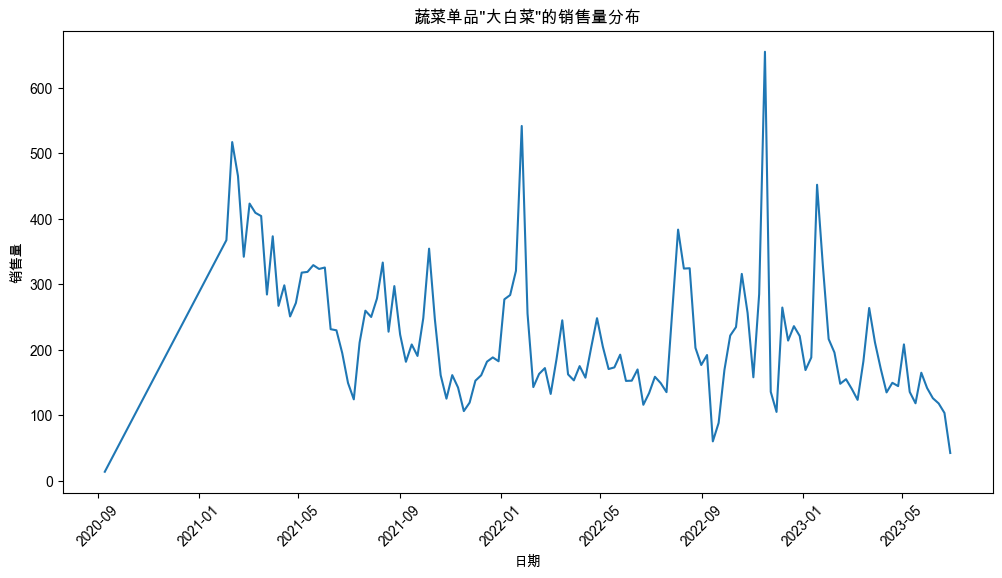

In [9]:
grouped = table.groupby(['单品类', pd.Grouper(key='销售日期', freq='7D')])['销量(千克)'].sum().reset_index()

top_product = grouped.groupby('单品类')['销量(千克)'].sum().idxmax()

max_sales = grouped['销量(千克)'].max()
top_product2 = grouped[grouped['销量(千克)'] == max_sales]['单品类'].values[0]

top_product_data = grouped[grouped['单品类'] == top_product]

# 绘制图表
plt.figure(figsize=(12, 6))
plt.plot(top_product_data['销售日期'], top_product_data['销量(千克)'])
plt.xlabel('日期')
plt.ylabel('销售量')
plt.title(f'蔬菜单品"{top_product2}"的销售量分布')
plt.xticks(rotation=45)
plt.savefig('蔬菜销售量变化_白菜_全年.png', dpi=300)
plt.show()

/var/folders/wz/4cyv558d01jb0_wb8_71vmz00000gn/T/ipykernel_23868/3484110586.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  table2['扫码销售时间'] = pd.to_datetime(table2['扫码销售时间'])


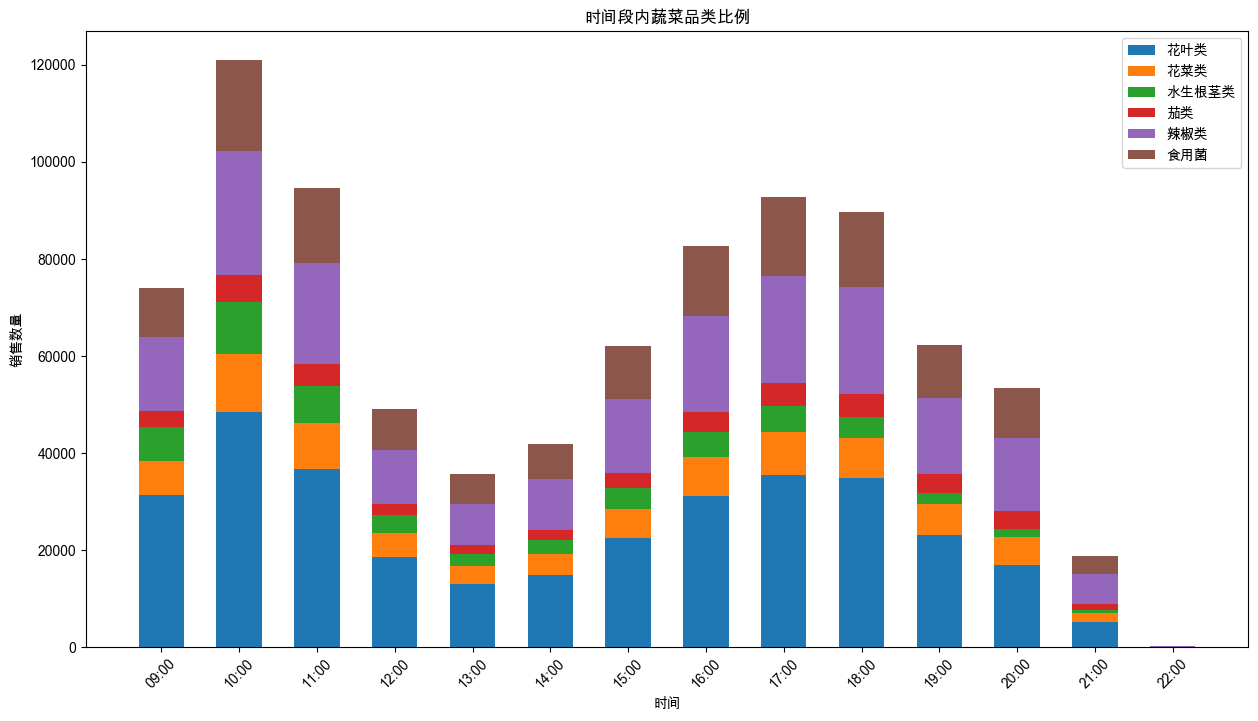

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

table2 = table.copy()

table2['销售日期'] = pd.to_datetime(table2['销售日期'], format='%Y-%m-%d')
table2['扫码销售时间'] = pd.to_datetime(table2['扫码销售时间'])
table2['扫码销售时间'] = pd.to_datetime(table2['扫码销售时间'], format='%H:%M:%S')
table2['扫码销售时间'] = table2['销售日期'] + pd.to_timedelta(table2['扫码销售时间'].dt.strftime('%H:%M:%S'))

start_time = pd.Timestamp('09:00:00')
end_time = pd.Timestamp('22:00:00')
time_interval = pd.Timedelta(hours=1)
categories = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']

time_range = pd.date_range(start=start_time, end=end_time, freq=time_interval)

data = pd.DataFrame(index=time_range, columns=categories)
data = data.fillna(0) 

for time_point in time_range:
    start_date = pd.Timestamp('2020-07-01') 
    end_date = pd.Timestamp('2023-06-30') 
    
    filtered_data = table2[(table2['扫码销售时间'].dt.time >= time_point.time()) & (table2['扫码销售时间'].dt.time < (time_point + time_interval).time())]
    for category in categories:
        count = filtered_data[filtered_data['大类'] == category].shape[0]
        data.at[time_point, category] = count

num_categories = len(categories)
bar_width = (end_time - start_time) / (len(time_range) * num_categories + num_categories - 1)

plt.figure(figsize=(15, 8))

for i, category in enumerate(categories):
    bottom = data.iloc[:, :i].sum(axis=1) 
    plt.bar(data.index, data[category], width=bar_width*4, bottom=bottom, label=category)

plt.xlabel('时间')
plt.ylabel('销售数量')
plt.title('时间段内蔬菜品类比例')
plt.legend(loc='upper right')

time_ticks = pd.date_range(start=start_time, end=end_time, freq='1H')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.savefig('蔬菜销售量变化_品类_单日.png', dpi=300)
plt.show()


In [13]:
table3 = table.copy()

table3['销售日期'] = pd.to_datetime(table3['销售日期'], format='%Y-%m-%d')
table3['扫码销售时间'] = pd.to_datetime(table3['扫码销售时间'])
table3['扫码销售时间'] = pd.to_datetime(table3['扫码销售时间'], format='%H:%M:%S')
table3['扫码销售时间'] = table3['销售日期'] + pd.to_timedelta(table3['扫码销售时间'].dt.strftime('%H:%M:%S'))

table3 = table3.sort_values(by='扫码销售时间')
category_counts = {}

time_window = pd.Timedelta(seconds=2)

previous_timestamp = None

for index, row in table3.iterrows():
    current_time = row['扫码销售时间']
    current_category = row['单品类']

    if previous_timestamp is not None and (current_time - previous_timestamp) <= time_window:
        combined_category = f"{table.at[index-1, '单品类']} & {current_category}"
        if combined_category in category_counts:
            category_counts[combined_category] += 1
        else:
            category_counts[combined_category] = 1
    previous_timestamp = current_time

sorted_counts = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
for category, count in sorted_counts:
    print(f"购买组合 {category} 的次数: {count}")


/var/folders/wz/4cyv558d01jb0_wb8_71vmz00000gn/T/ipykernel_23868/3902157128.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  table3['扫码销售时间'] = pd.to_datetime(table3['扫码销售时间'])


购买组合 西兰花 & 芜湖青椒(1) 的次数: 1325
购买组合 芜湖青椒(1) & 西兰花 的次数: 1249
购买组合 西兰花 & 西峡香菇(1) 的次数: 1120
购买组合 芜湖青椒(1) & 西峡香菇(1) 的次数: 1098
购买组合 西峡香菇(1) & 芜湖青椒(1) 的次数: 1079
购买组合 西峡香菇(1) & 西兰花 的次数: 979
购买组合 芜湖青椒(1) & 紫茄子(2) 的次数: 959
购买组合 西兰花 & 净藕(1) 的次数: 922
购买组合 净藕(1) & 西峡香菇(1) 的次数: 908
购买组合 芜湖青椒(1) & 净藕(1) 的次数: 901
购买组合 紫茄子(2) & 芜湖青椒(1) 的次数: 895
购买组合 金针菇(盒) & 金针菇(盒) 的次数: 891
购买组合 西峡香菇(1) & 净藕(1) 的次数: 850
购买组合 净藕(1) & 芜湖青椒(1) 的次数: 828
购买组合 西兰花 & 云南生菜 的次数: 825
购买组合 云南生菜 & 芜湖青椒(1) 的次数: 811
购买组合 云南生菜 & 西兰花 的次数: 810
购买组合 洪湖莲藕(粉藕) & 洪湖莲藕(粉藕) 的次数: 789
购买组合 净藕(1) & 西兰花 的次数: 773
购买组合 枝江青梗散花 & 枝江青梗散花 的次数: 721
购买组合 芜湖青椒(1) & 云南生菜 的次数: 704
购买组合 大白菜 & 大白菜 的次数: 688
购买组合 云南生菜 & 西峡香菇(1) 的次数: 643
购买组合 保康高山大白菜 & 保康高山大白菜 的次数: 623
购买组合 西峡香菇(1) & 云南生菜 的次数: 591
购买组合 芜湖青椒(1) & 红椒(1) 的次数: 586
购买组合 红椒(1) & 芜湖青椒(1) 的次数: 562
购买组合 云南生菜(份) & 云南生菜(份) 的次数: 556
购买组合 西兰花 & 紫茄子(2) 的次数: 534
购买组合 芜湖青椒(1) & 芜湖青椒(1) 的次数: 528
购买组合 紫茄子(2) & 西兰花 的次数: 505
购买组合 云南油麦菜 & 芜湖青椒(1) 的次数: 488
购买组合 泡泡椒(精品) & 西峡香菇(1) 的次数: 483
购买组合 西峡香菇(1) & 泡泡椒(精品) 的次数: 4

In [14]:
categories2 = []
names = pd.read_excel("附件1.xlsx")
for i in range(251):
    categories2.append(names.loc[i,'单品名称'])

categories2

['牛首生菜',
 '四川红香椿',
 '本地小毛白菜',
 '白菜苔',
 '苋菜',
 '云南生菜',
 '竹叶菜',
 '小白菜',
 '南瓜尖',
 '上海青',
 '萝卜叶',
 '牛首油菜',
 '茼蒿',
 '蔡甸藜蒿',
 '菜心',
 '木耳菜',
 '大白菜',
 '豌豆尖',
 '云南油麦菜',
 '马齿苋',
 '本地菠菜',
 '黄心菜(1)',
 '黑油菜',
 '本地上海青',
 '菠菜',
 '娃娃菜',
 '红薯尖',
 '枝江红菜苔',
 '黄花菜',
 '快菜',
 '随州泡泡青',
 '田七',
 '东门口小白菜',
 '外地茼蒿',
 '冰草',
 '紫苏',
 '薄荷叶',
 '蒲公英',
 '丝瓜尖',
 '奶白菜',
 '芥菜',
 '大芥兰',
 '面条菜',
 '甜白菜',
 '荠菜',
 '马兰头',
 '甘蓝叶',
 '洪山菜苔',
 '本地黄心油菜',
 '青菜苔',
 '小青菜(1)',
 '鲜粽子叶',
 '艾蒿',
 '奶白菜苗',
 '菊花油菜',
 '双沟白菜',
 '枝江红菜苔(份)',
 '云南生菜(份)',
 '云南油麦菜(份)',
 '茼蒿(份)',
 '菠菜(份)',
 '菜心(份)',
 '上海青(份)',
 '小青菜(2)',
 '洪山菜薹珍品手提袋',
 '洪山菜薹莲藕拼装礼盒',
 '鱼腥草(份)',
 '冰草(盒)',
 '紫苏(份)',
 '襄甜红菜苔(袋)',
 '白蒿',
 '鱼腥草',
 '竹叶菜(份)',
 '春菜',
 '槐花',
 '红薯尖(份)',
 '蔡甸藜蒿(份)',
 '红珊瑚(粗叶)',
 '红橡叶',
 '绿牛油',
 '保康高山大白菜',
 '黄心菜(2)',
 '苋菜(份)',
 '小白菜(份)',
 '小青菜(份)',
 '奶白菜(份)',
 '芝麻苋菜',
 '鲜粽叶',
 '鲜粽叶(袋)(1)',
 '外地茼蒿(份)',
 '龙牙菜',
 '黄白菜(1)',
 '大白菜秧',
 '木耳菜(份)',
 '芥兰',
 '油菜苔',
 '黄白菜(2)',
 '紫贝菜',
 '鲜粽叶(袋)(2)',
 '鲜粽叶(袋)(3)',
 '西兰花',
 '紫白菜(1)',
 '青梗散花',
 '紫白菜(2)',
 '枝江青梗散花',
 '藕',
 '净藕(1)

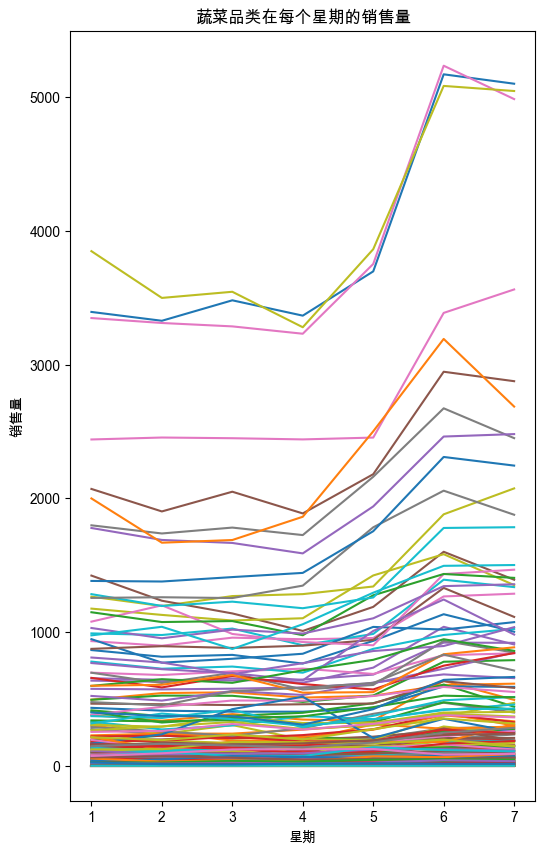

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
table4 = table.copy()
table4['星期几'] = table4['销售日期'].dt.weekday + 1

weekdays = [1,2,3,4,5,6,7]
categories = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']
data = pd.DataFrame(index=weekdays, columns=categories2, data=0)

grouped = table4.groupby(['星期几', '单品类', table4['销售日期'].dt.date])['销量(千克)'].sum().reset_index(name='销售量')

for index, row in grouped.iterrows():
    weekday = row['星期几']
    category = row['单品类']
    sales = row['销售量']
    data.loc[weekday, category] += sales

plt.figure(figsize=(6, 10))

for category in categories2:
    category_sales = data[category]
    plt.plot(weekdays, category_sales, label=category)

plt.xlabel('星期')
plt.ylabel('销售量')
plt.title('蔬菜品类在每个星期的销售量')
#plt.legend(loc='best')
plt.savefig('蔬菜销售量变化_品类_单周.png', dpi=300)
plt.show()

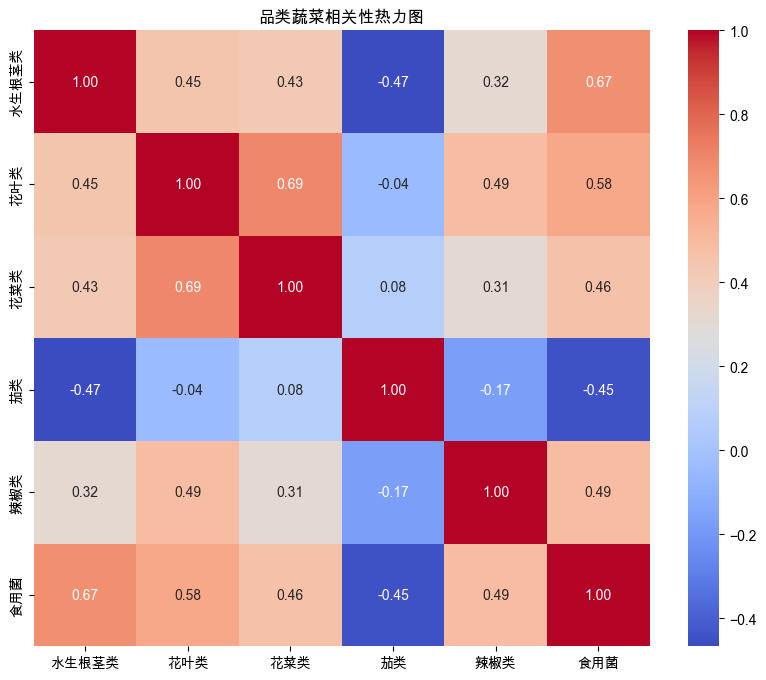

In [16]:
import seaborn as sns

spearman = pd.read_excel('spearman_set.xlsx')

categories = ['水生根茎类', '花叶类', '花菜类', '茄类', '辣椒类', '食用菌']
sales_data = spearman[categories].values
correlation_matrix = spearman[categories].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f",
            xticklabels=categories, yticklabels=categories)

plt.title('品类蔬菜相关性热力图')
#plt.savefig('蔬菜销售量变化_品类_单周.png', dpi=300)
plt.show()

In [17]:
table5 = table.copy()

table5['销售日期'] = pd.to_datetime(table5['销售日期']).dt.to_period('M')
grouped = table5.groupby(['单品类', '销售日期'])['销量(千克)'].sum().reset_index()
product_names = grouped['单品类'].unique()

monthly_sales_251 = pd.DataFrame(index=pd.period_range('2020-07', '2023-07', freq='M'), columns=product_names)

for product in product_names:
    product_sales = grouped[grouped['单品类'] == product].set_index('销售日期')['销量(千克)']
    monthly_sales_251[product] = product_sales

monthly_sales_251 = monthly_sales_251.fillna(0)

monthly_sales_251

,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
2020-07,32.928,0.000,0.0,452.999,0.0,55.090,0.000,935.567,0.0,958.044,...,0.000,0.000,499.274,0.000,0.000,0.000,0.0,0.000,0.0,0.000
2020-08,14.843,0.000,0.0,702.708,0.0,50.767,0.000,745.185,0.0,905.914,...,0.000,0.000,1082.012,0.000,0.000,0.000,0.0,0.000,0.0,0.000
2020-09,14.841,0.000,0.0,529.028,0.0,47.205,0.000,319.056,0.0,856.958,...,0.000,0.000,646.668,0.000,0.000,0.000,0.0,0.482,0.0,0.000
2020-10,14.177,0.000,0.0,256.740,0.0,52.200,0.000,337.648,0.0,689.728,...,0.000,0.000,228.933,0.000,0.000,0.000,0.0,0.764,0.0,0.000
2020-11,13.523,0.000,0.0,152.065,0.0,24.107,0.000,330.112,0.0,375.571,...,0.000,0.000,121.415,0.000,0.000,0.000,0.0,0.616,0.0,0.000
2020-12,29.177,0.000,0.0,152.823,0.0,31.250,0.000,420.726,0.0,388.756,...,0.000,0.000,145.255,0.000,0.000,0.000,0.0,3.933,0.0,0.000
2021-01,29.480,0.000,0.0,255.919,0.0,62.923,0.000,473.764,0.0,382.120,...,0.000,0.000,158.020,0.000,0.000,0.000,0.0,0.000,0.0,0.000
2021-02,11.448,0.000,0.0,408.955,0.0,44.480,4.231,752.867,0.0,538.707,...,0.000,0.000,139.273,0.000,0.000,0.000,0.0,0.000,0.0,0.000
2021-03,1.533,0.000,0.0,393.509,0.0,55.459,0.000,706.430,0.0,666.582,...,0.000,0.000,183.588,0.000,0.000,0.000,0.0,0.000,0.0,0.000
2021-04,0.490,0.000,0.0,403.399,0.0,120.176,0.000,333.600,0.0,570.904,...,0.000,0.000,274.945,0.000,0.000,0.000,0.0,0.000,0.0,0.000


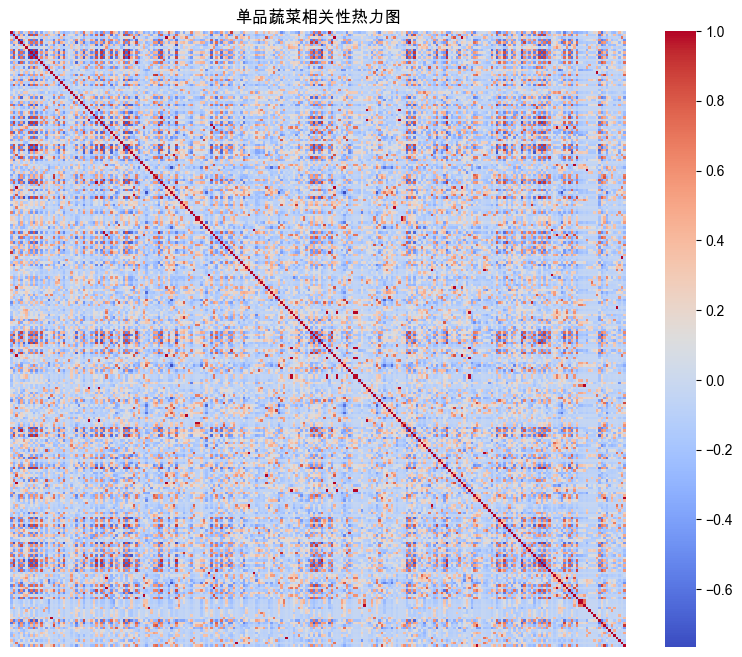

In [18]:
categories3 = monthly_sales_251.columns.tolist()

sales_data = monthly_sales_251[categories3].values
correlation_matrix = monthly_sales_251[categories3].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
plt.xlabel('')
plt.ylabel('')
plt.title('单品蔬菜相关性热力图')
plt.xticks([])
plt.yticks([])

#plt.savefig('热力图2.png', dpi=300)
plt.show()

In [19]:
print(correlation_matrix.loc['西兰花','芜湖青椒(1)'])
print(correlation_matrix.loc['西峡香菇(1)','芜湖青椒(1)'])
print(correlation_matrix.loc['西兰花', '西峡香菇(1)'])
print(correlation_matrix.loc['芜湖青椒(1)', '紫茄子(2)'])
print(correlation_matrix.loc['芜湖青椒(1)', '净藕(1)'])

0.1103716871779568
0.03855780241349176
0.3678093399742468
0.11322612736359361
0.16246522056582866
